<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/u5_seaborn_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 5 - Seaborn

Basado en
- Python Data Science Handbook - Jakes VanderPlas
- Seaborn - [API Reference](https://seaborn.pydata.org/api.html)
- Fundamentals of Data Visualization by Claus O. Wilke. [online](https://clauswilke.com/dataviz/)


[Seaborn](http://seaborn.pydata.org) tiene una API hecha sobre Matplotlib que ofrece opciones de estilo y valores predeterminados de color, define funciones simples de alto nivel gráficos de estadísticas comunes y se integra con la funcionalidad proporcionada por Pandas.

In [ ]:
# !pip install seaborn

Por convención Seaborn se importa como `sns`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


`set` inicializa estilos en seaborn

In [ ]:
sns.set()

# Histogramas, Densidades


In [ ]:
np.random.seed(1234567)
rng = np.random.default_rng(seed=0)

# parametros de normal:
# centro de la distribucion (media teorica),
#dispercion o ancho de la distribucion (std dev teorica)
x = rng.normal(loc=0, scale=1, size=200)
y = rng.normal(0, 2, 200)

data = pd.DataFrame({"x":x,"y":y})

data


x         y
0    0.125730 -1.327070
1   -0.132105 -1.226836
2    0.640423 -3.210299
3    0.104900  1.458699
4   -0.535669  1.612279
..        ...       ...
195  1.643252  0.178112
196 -1.282649  3.188314
197 -0.585658 -2.190944
198 -0.472588  0.725005
199  0.586337  0.887983

[200 rows x 2 columns]

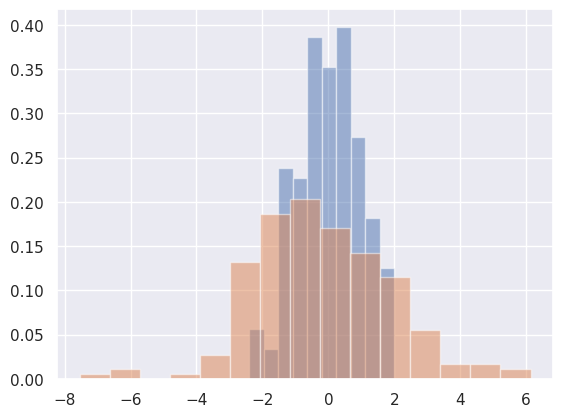

In [ ]:

# Histogramas con matplotlib
ax = plt.axes()
ax.hist(data["x"], density=True, alpha=0.5, bins="auto");
ax.hist(data["y"], density=True, alpha=0.5, bins="auto");

`seaborn` está más integrado con pandas, los histogramas se pueden dibujar así:


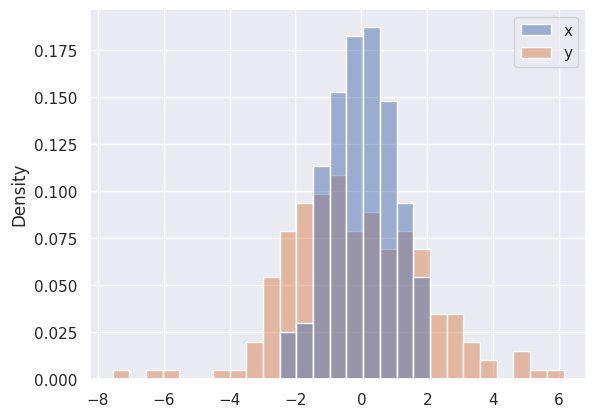

In [ ]:
axe = sns.histplot(data=data[["x", "y"]], stat="density")


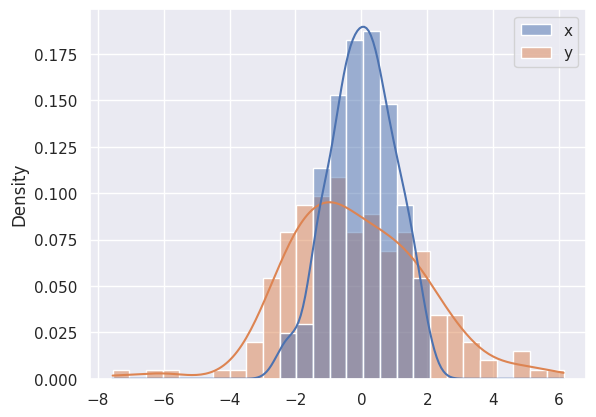

In [ ]:
axe = sns.histplot(data=data[["x", "y"]], stat="density", kde=True) #, common_norm=False); # multiple='stack'

Algunos argumentos:

**multiple {“layer”, “dodge”, “stack”, “fill”}**
Approach to resolving multiple elements when semantic mapping creates subsets. Only relevant with univariate data.

**element {“bars”, “step”, “poly”}**
Visual representation of the histogram statistic. Only relevant with univariate data.

**fill bool**
If True, fill in the space under the histogram. Only relevant with univariate data.

**kde bool**
If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

**stat str**: Aggregate statistic to compute in each bin.
- __count__: show the number of observations in each bin
- __frequency__: show the number of observations divided by the bin width
- __probability or proportion__: normalize such that bar heights sum to 1
- __percent__: normalize such that bar heights sum to 100
- __density__: normalize such that the total area of the histogram equals 1

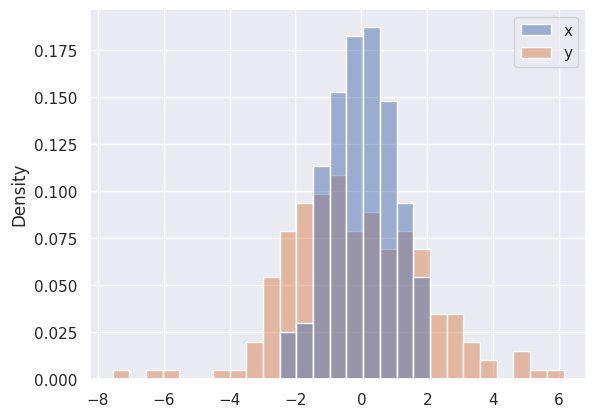

In [ ]:
axe = sns.histplot(data=data[["x", "y"]], stat="density", element="bars", kde=False, multiple='layer')

### kde

Con `sns.kdeplot` podemos obtener una estimación suave de la distribución utilizando la estimación de densidad del kernel (KDE)  

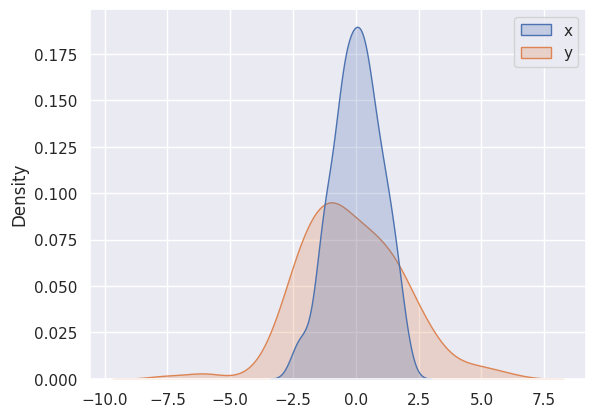

In [ ]:
# KDE
sns.kdeplot(data=data, fill=True);

Si pasamos las columnas `x` and `y`, obtenemos una visualizacion 2d de la densidad conjunta (joint density):

<Axes: xlabel='x', ylabel='y'>

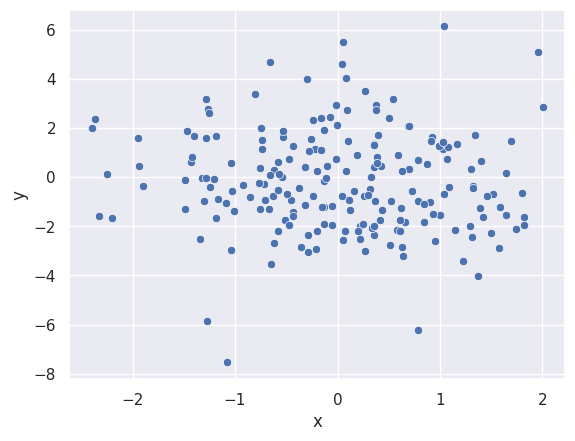

In [ ]:
sns.scatterplot(data=data, x='x', y='y')



`kdeplot` permite realizar graficos de contorno

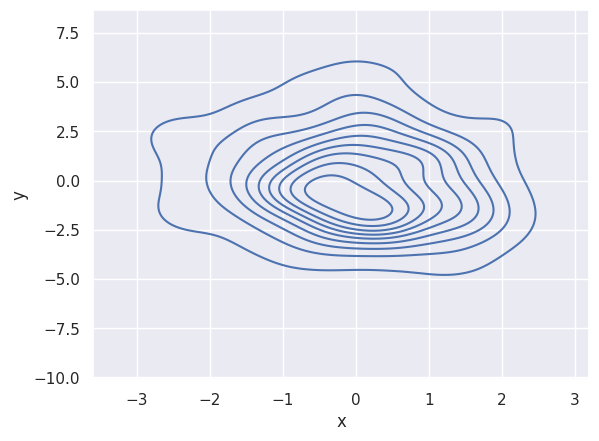

In [ ]:

sns.kdeplot(data=data, x='x', y='y');


`sns.jointplot` (más adelante) también permite visualizar con otras opciones la relacion entre variables.

### Interpretación de gráficos de contorno

Graficos de contornos:
https://clauswilke.com/dataviz/overlapping-points.html#contour-lines

# blue jays == azulejo

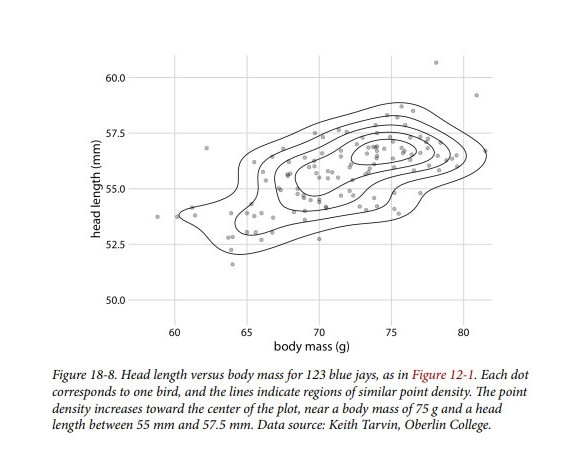

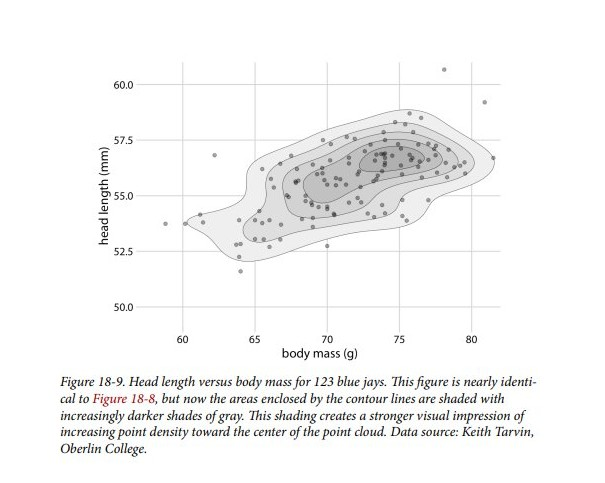

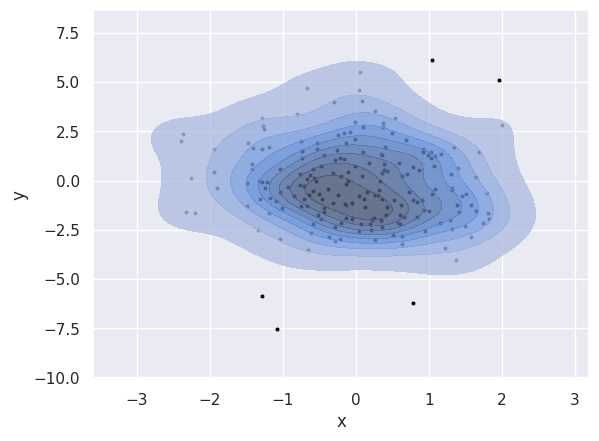

In [ ]:
#sns.scatterplot(data=data, x='x', y='y')

sns.scatterplot(data=data, x='x', y='y', alpha=1, s=10, color="black")

#sns.kdeplot(data=data, x='x', y='y', alpha=0.8)

sns.kdeplot(data=data, x='x', y='y', fill=True, alpha=0.8);


# Pair Plots

Los *pair plots* son utiles para explorar correlaciones entre varias dimensiones porque generan varios gráficos de cada variables vs las otras.

Mostramos un ejemplo con el dataset de flores de Lirio de 1936. [Iris dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), que lista varias medidas de petalos y sepalos de las flroes de tres especies Iris.

In [ ]:
# como es el dataset?
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
# cuales son las especies?

pd.unique(iris["species"])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

![Medidas](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

``sns.pairplot`` sirve para visualizar facilmente relaciones multidimencionales, mezclando histogramas y dispersiones.

* Parámetro **hue (vector or key in data):**  Variable de agrupación que producirá puntos con diferentes colores. Puede ser categórico o numérico, aunque el mapeo de color se comportará de manera diferente en este último caso.

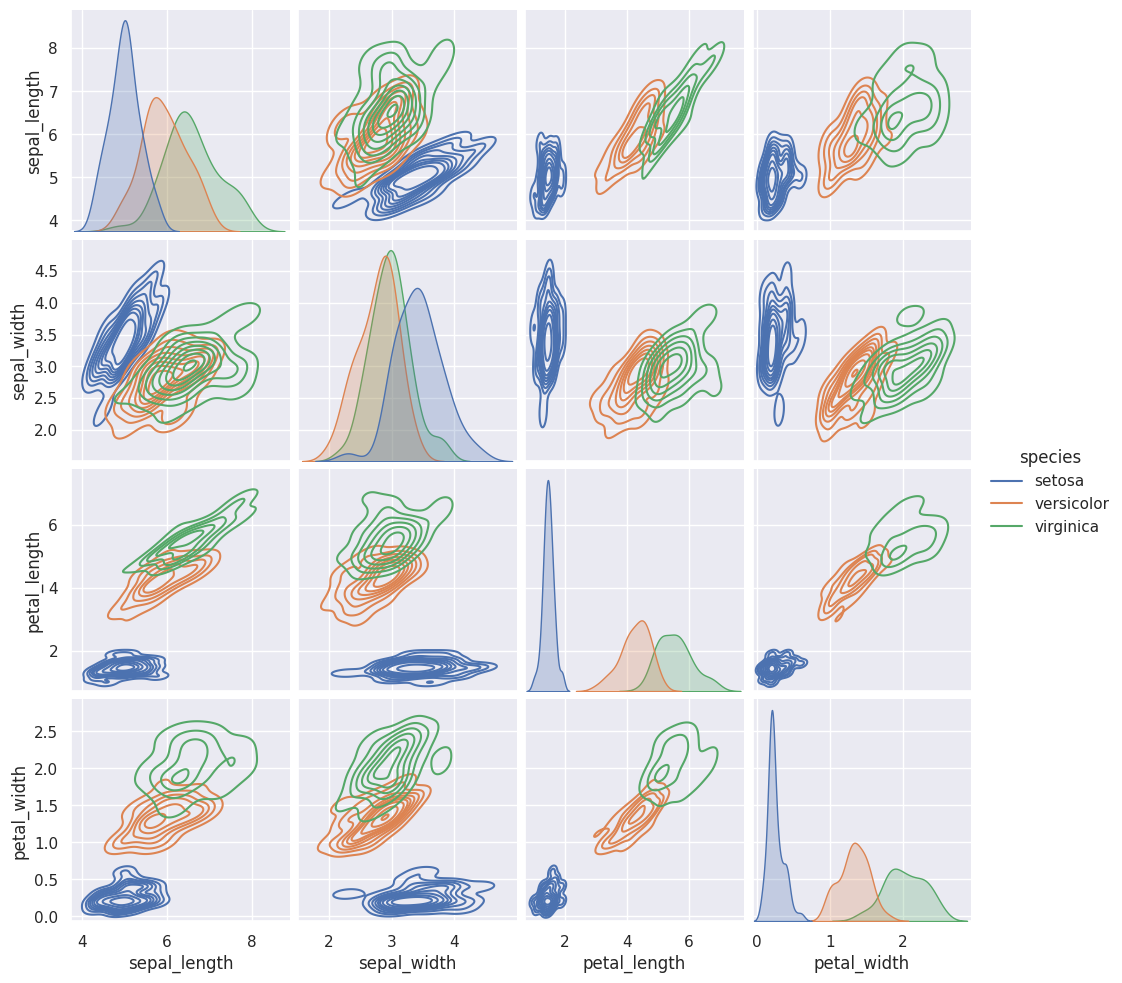

In [ ]:
# vemos los gráficos en pares de variables

#- kind {‘scatter’, ‘kde’, ‘hist’, ‘reg’} Kind of plot to make.

sns.pairplot(iris, hue='species', height=2.5, kind="kde");

Argumento **kind**

- kind {‘scatter’, ‘kde’, ‘hist’, ‘reg’} Kind of plot to make.

# Lineplots y el parámetro hue


Referencia: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [ ]:
flights = sns.load_dataset("flights")
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

Vuelos de un mes

In [ ]:
may_flights = flights[flights["month"] == "May"] # .query("month == 'May'")
may_flights

year month  passengers
4    1949   May         121
16   1950   May         125
28   1951   May         172
40   1952   May         183
52   1953   May         229
64   1954   May         234
76   1955   May         270
88   1956   May         318
100  1957   May         355
112  1958   May         363
124  1959   May         420
136  1960   May         472

<Axes: xlabel='year', ylabel='passengers'>

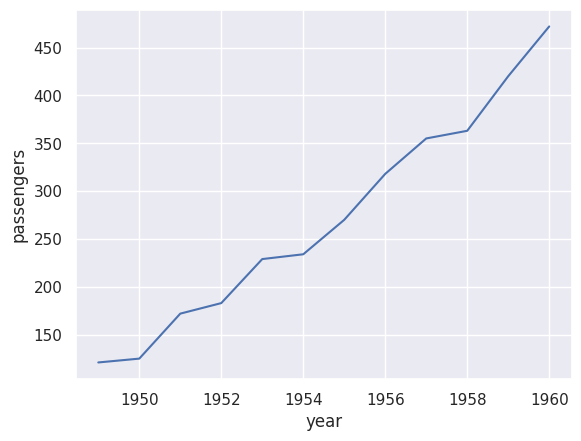

In [ ]:
sns.lineplot(data=may_flights, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

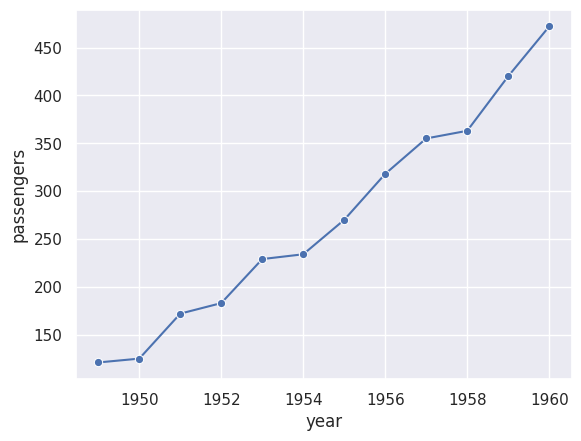

In [ ]:
sns.lineplot(data=may_flights, x="year", y="passengers", marker="o")

El parámetro `style` agrupo por la columna indicada, y va asigando a grupo un estilo de linea distinto

<Axes: xlabel='year', ylabel='passengers'>

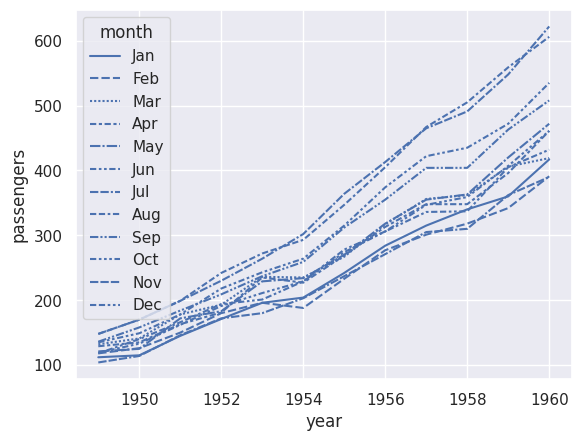

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", style="month")


El parámetro `hue` agrupa por la columna indicada, y va asigando un color o matíz a la linea para cada grupo.

<Axes: xlabel='year', ylabel='passengers'>

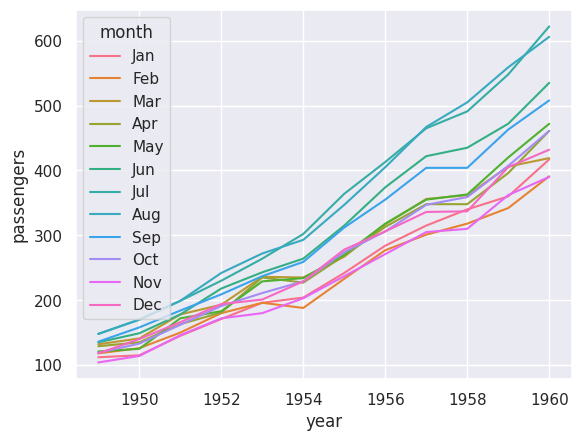

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")


Cuando existen multiples valores para "x". `lineplot` calcula la media de los multiples valores.  

In [ ]:
extra = pd.DataFrame(
        {"year": [1949],
         "month": ["Jan"],
         "passengers":[600]}
    )

dfx = pd.concat([flights, extra], ignore_index=True)

dfx


year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432
144  1949   Jan         600

[145 rows x 3 columns]

<Axes: xlabel='year', ylabel='passengers'>

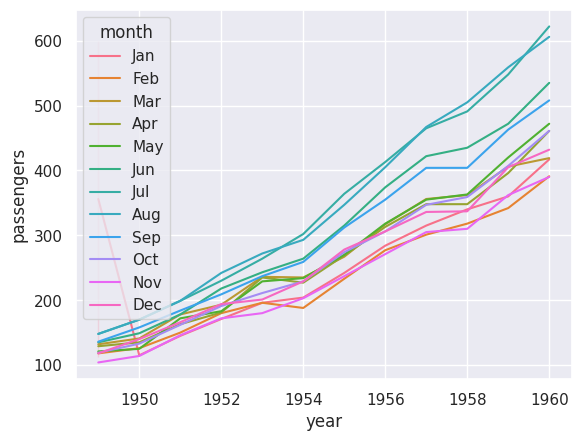

In [ ]:
sns.lineplot(data=dfx, x="year", y="passengers", hue="month")


<Axes: xlabel='year', ylabel='passengers'>

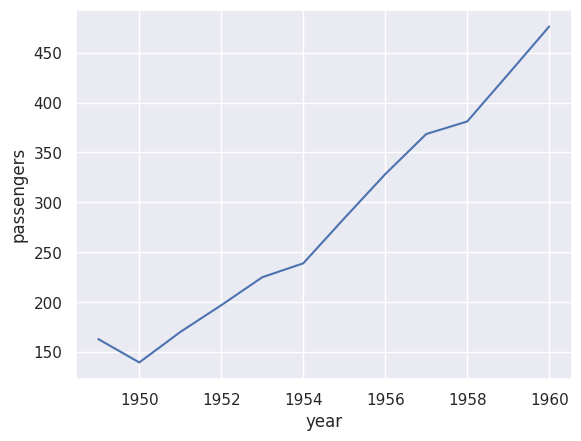

In [ ]:
sns.lineplot(data=dfx, x="year", y="passengers", errorbar=None)

<Axes: xlabel='year', ylabel='passengers'>

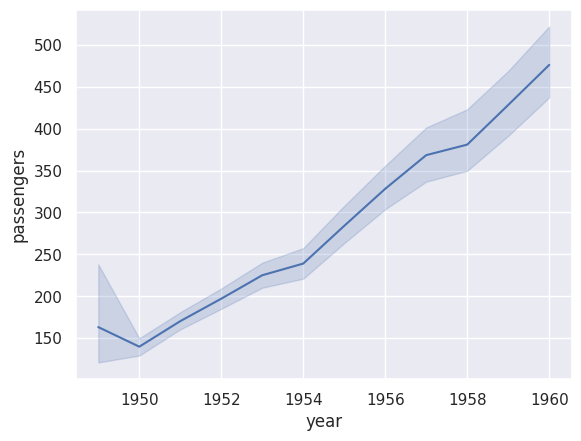

In [ ]:
sns.lineplot(data=dfx, x="year", y="passengers")

Name of `errorbar` method (either “ci”, “pi”, “se”, or “sd”), or a tuple with a method name and a level parameter, or a function that maps from a vector to a (min, max) interval.

Reference: https://seaborn.pydata.org/tutorial/error_bars

# Gráficos de barras

In [ ]:
flights = sns.load_dataset("flights")
flights


year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [ ]:
mil958_flights = flights[flights["year"] == 1958]
mil958_flights

year month  passengers
108  1958   Jan         340
109  1958   Feb         318
110  1958   Mar         362
111  1958   Apr         348
112  1958   May         363
113  1958   Jun         435
114  1958   Jul         491
115  1958   Aug         505
116  1958   Sep         404
117  1958   Oct         359
118  1958   Nov         310
119  1958   Dec         337

Dibujar graficos de barra con matplotlib

<BarContainer object of 12 artists>

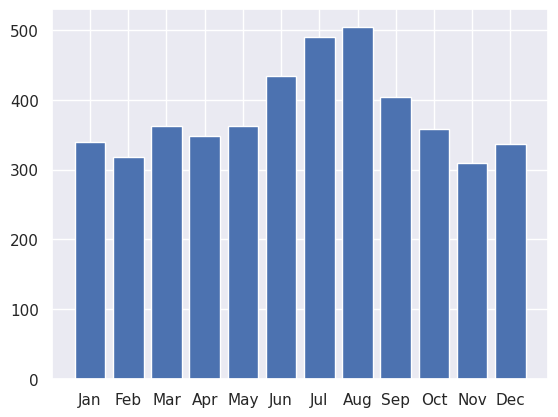

In [ ]:
plt.bar(mil958_flights["month"], mil958_flights["passengers"])

Para dibujar barras con seaborn se usa barplot y se debe indicar que series tomar para cada eje.

<Axes: xlabel='month', ylabel='passengers'>

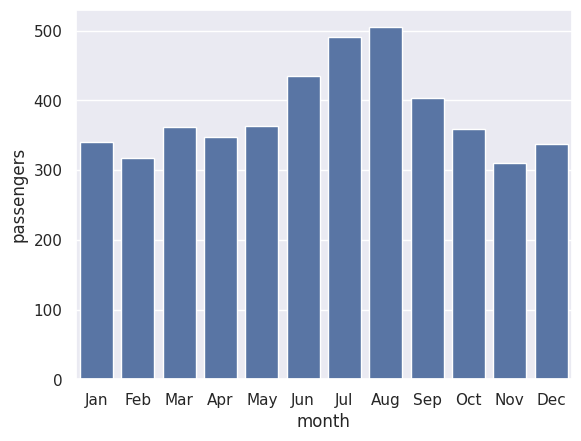

In [ ]:
sns.barplot(data=mil958_flights, x="month", y="passengers")

Cuando hay mas de un valor para 'x' barplot suma y calcula el promedio (estimator = "mean"

<Axes: xlabel='month', ylabel='passengers'>

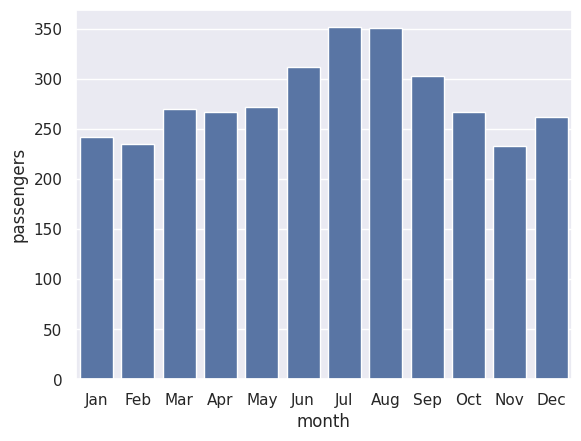

In [ ]:
sns.barplot(data=flights, x="month", y="passengers", errorbar=None)

<Axes: xlabel='month', ylabel='passengers'>

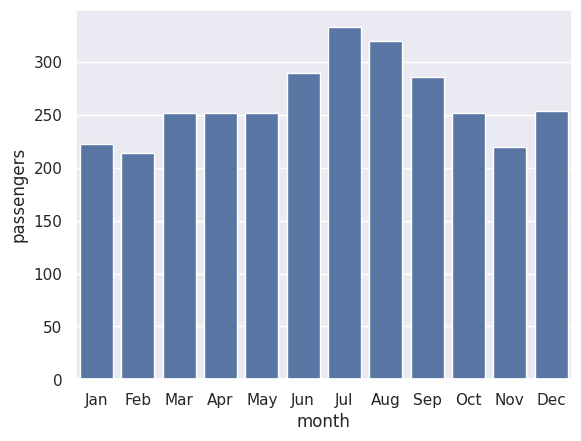

In [ ]:
sns.barplot(data=flights, x="month", y="passengers", estimator="median", errorbar=None)

<Axes: xlabel='passengers', ylabel='month'>

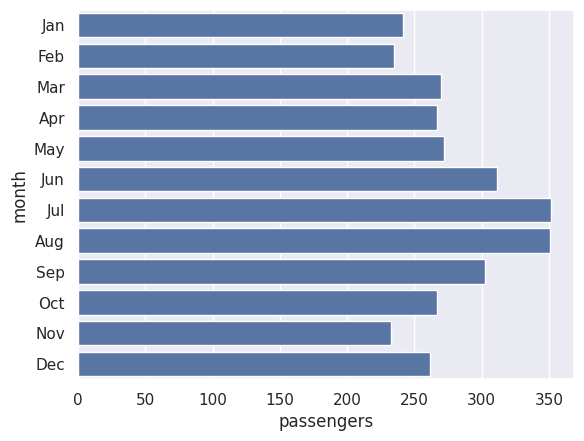

In [ ]:
sns.barplot(data=flights, x="passengers", y="month", estimator="mean", orient="h", errorbar=None)

Usan hue asigna un color distinto a cada grupo de datos.
Podemos observar como va siendo el incremento de pasajeros mes a mes interanualmente.


<Axes: xlabel='year', ylabel='passengers'>

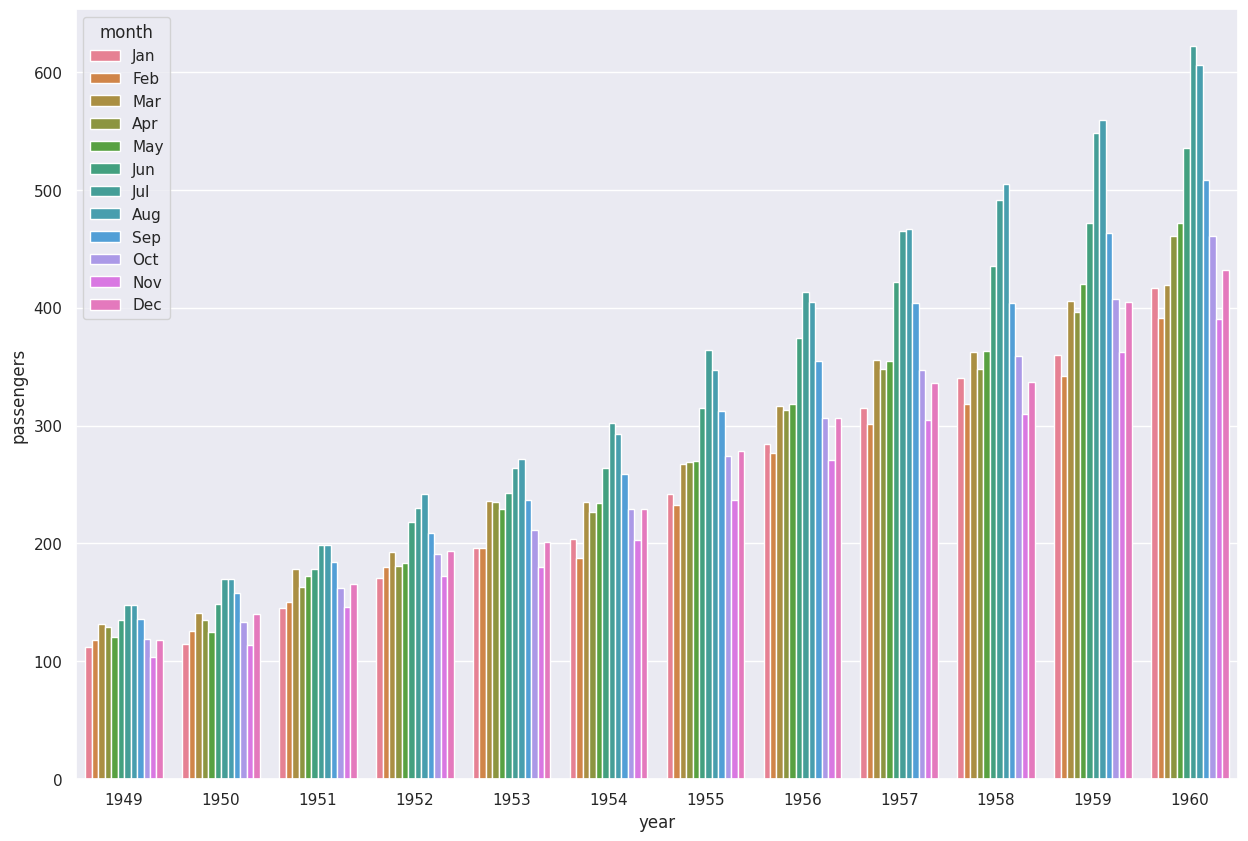

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=flights, x="year", y="passengers", hue="month", width=0.8)

# Faceted Grid

Las grillas facetadas permite comparar una variable dentro de un subconjunto de datos dentro de facetas o niveles de variables.

`tips` es un dataset que muestra la cantidad de propinas que el personal del restaurante recibe basadas en varios datos indicadores(*).

(*) Los datos del personal del restaurante ut
ilizados en esta sección dividen a los empleados en dos sexos: mujeres y hombres. El sexo biológico no es binario, pero la siguiente discusión y visualizaciones están limitadas por estos datos.

NOTA: Para ver más ejemplos de gráficos de seaborn y matplotlib con este mismo dataset, se puede visitar el siguiente [notebook compartido en kaggle](https://www.kaggle.com/code/sanjanabasu/tips-dataset)

In [ ]:
# cargamos el dataset de ejemplo de seaborn

tips = sns.load_dataset('tips')

In [ ]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [ ]:
# calculamos las propinas en terminos de porcentajes
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']


tips

total_bill   tip     sex smoker   day    time  size    tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2  15.974441

[244 rows x 8 columns]

`FacetGrid` mapea un dataframe en multiples ejes dispuestos en una cuadrícula de filas y columnas que corresponden a _niveles_ de variables en el conjunto de datos. Los gráficos que produce a menudo se denominan gráficos de "celosía", "grillas".

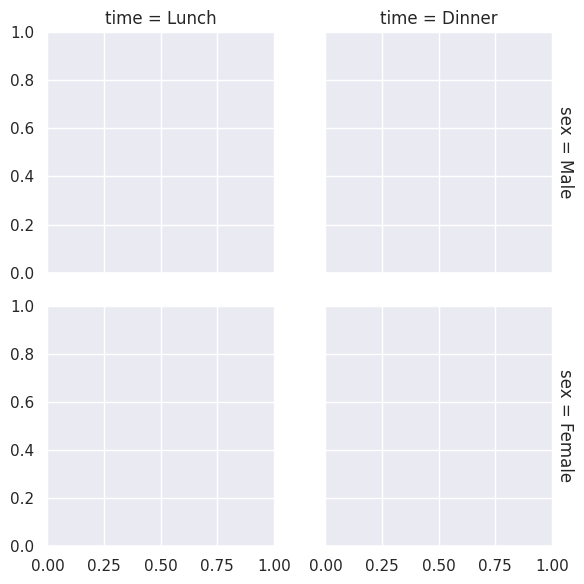

In [ ]:
# generamos una grilla con informacion de  columnas del dataframe
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True) # margin_titles=False

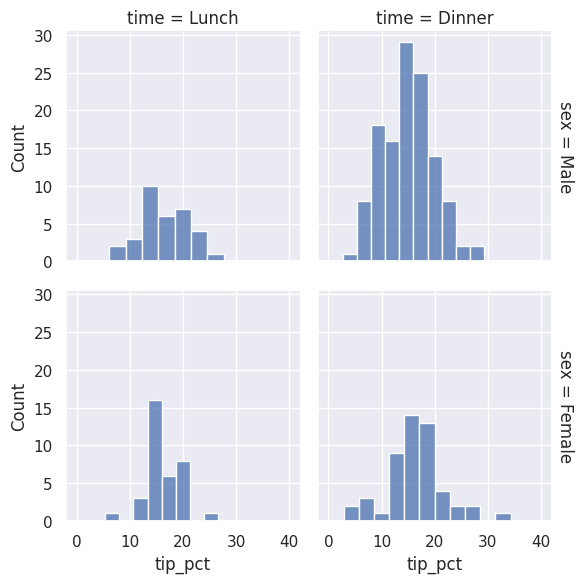

In [ ]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

# a cada celda de la grilla mapeamos una funcion de dibujo con sus parametros ordenados
grid.map(sns.histplot, "tip_pct", binrange=(0, 40)); # sns.histplot,  bins=15, binrange=(0, 40)

El gráfico facetado en subconjuntos nos da algunas ideas rápidas sobre el conjunto de datos:

* vemos que contiene muchos más datos sobre servidores masculinos durante la hora de la cena que otras categorías,
* las cantidades típicas de propina parecen oscilar entre aproximadamente el 10% y el 20%,
* existen algunos valores atípicos en cada extremo.

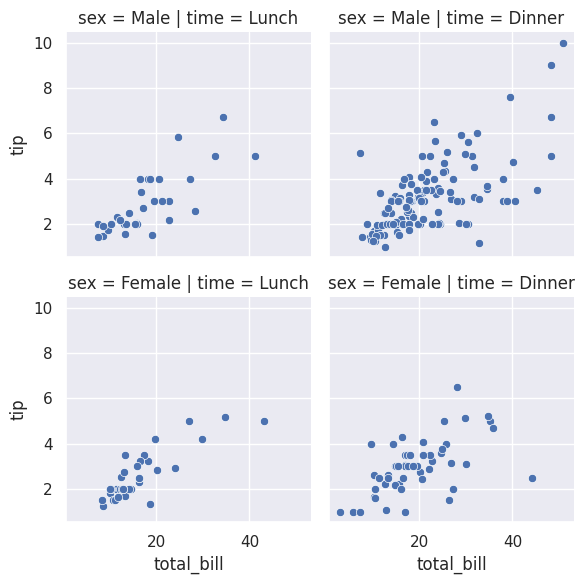

In [ ]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=False)

# a cada celda de la grilla mapeamos una funcion de dibujo con sus parametros por orden
grid.map(sns.scatterplot, "total_bill", "tip");

La especificación de variables en `FacetGrid.map()` requiere una asignación de **argumentos posicionales**, pero si la función tiene un parámetro de datos y acepta asignaciones de **argumentos con nombre**, también puede usar `FacetGrid.map_dataframe()`

Por ejemplo con [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

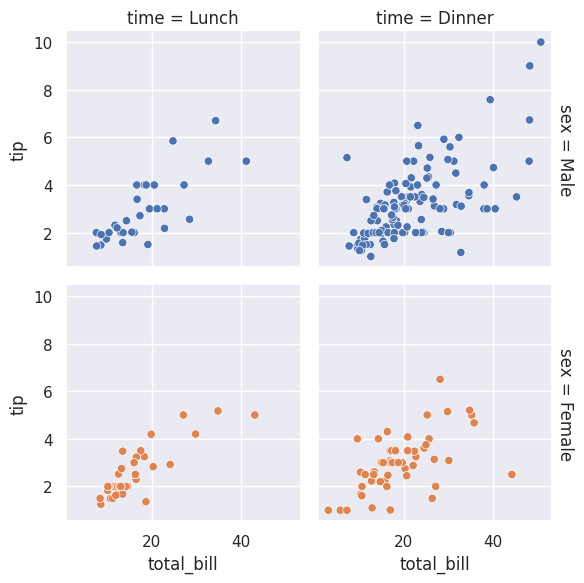

In [ ]:
# facetamos por columna time
g = sns.FacetGrid(tips, col="time", row="sex", margin_titles=True)

# usamos map_dataframe, para poder usar parametros con nombre
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", hue="sex")

Otro ejemplo de datos facetados usando histogramas

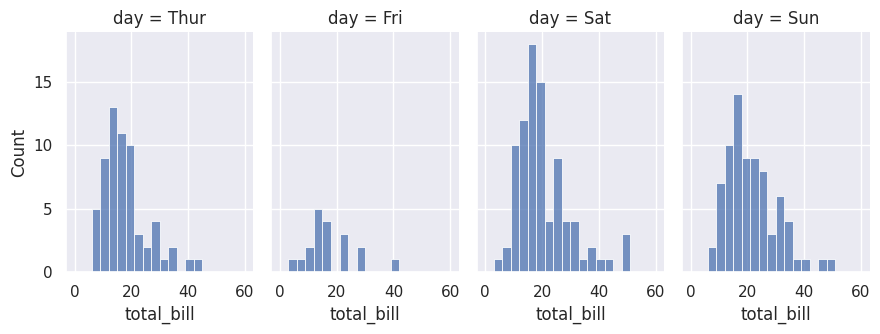

In [ ]:
# como se comporta la cuenta total segun el dia?
# Hacer multiples gráficos para cada dia y para
# cada subconjunto de datos ejecutar un histograma

g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)

g.map(sns.histplot, "total_bill", binwidth=3, binrange=(0, 60));


# Categorical Plots

Las gráficas categóricas también pueden ser útiles para este tipo de visualización. Estos le permiten ver la distribución de un parámetro dentro de los contenedores definidos por cualquier otro parámetro, como se muestra en la siguiente figura:

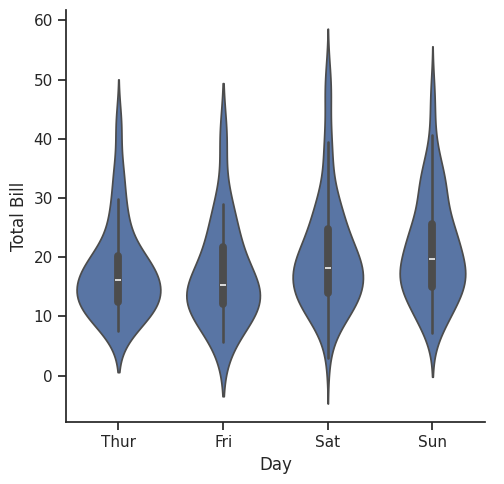

In [ ]:
# kind="box", kind="violin", kind="boxen")
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", data=tips, kind="violin")
    g.set_axis_labels("Day", "Total Bill");


con el argumendo `kind` se pueden llamar muchos tipos de gráficos categoricoc. [seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)

The **kind** parameter selects the underlying axes-level function to use:

* Categorical scatterplots:

  * stripplot() (with kind="strip"; the default)
  * swarmplot() (with kind="swarm")

* Categorical distribution plots:
  * boxplot() (with kind="box")
  * violinplot() (with kind="violin")
  * boxenplot() (with kind="boxen")

* Categorical estimate plots:
  * pointplot() (with kind="point")
  * barplot() (with kind="bar")
  * countplot() (with kind="count")

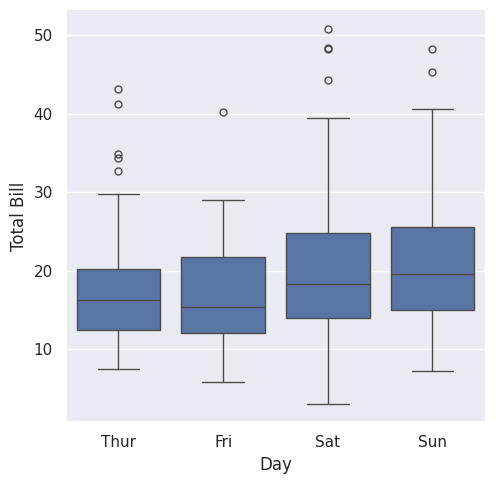

In [ ]:
# kind="box", kind="violin", kind="boxen")
g = sns.catplot(x="day", y="total_bill", data=tips, kind="box")
g.set_axis_labels("Day", "Total Bill");

Con seaborn tambi én podemos mezclar gráficos.


El siguiente gráfico muestra la desviación de los valores de los ultimos meses respecto de los valores promedio históricos.  

In [ ]:
# el promedio de las cuenta de la ultima semana dia a dia
bill_median_last_week = pd.DataFrame({
    "day": ["Thur", "Fri", "Sat", "Sun"],
    "total_bill": [13.4, 18.2, 32.3, 30.2]
}
)

bill_median_last_week


day  total_bill
0  Thur        13.4
1   Fri        18.2
2   Sat        32.3
3   Sun        30.2

<Axes: xlabel='Day', ylabel='Total Bill'>

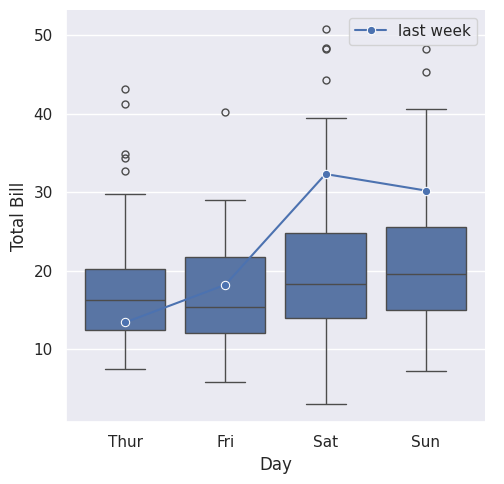

In [ ]:

# kind="box", kind="violin", kind="boxen")
g = sns.catplot(x="day", y="total_bill", data=tips, kind="box")
g.set_axis_labels("Day", "Total Bill");

sns.lineplot(x="day", y="total_bill", marker="o", data=bill_median_last_week, label="last week")

## Ejemplo uso de box plot en servicio metereologico nacional

* Fuente: https://www.smn.gob.ar/clima/vigilancia
* Referecencias: https://www.smn.gob.ar/sites/default/files/Referencias_Graficos_Monitoreo.pdf

La evolución de las temperaturas mensuales, ya sea de las temperaturas máximas,
mínimas o medias, están representadas por líneas de color naranja, azul o violeta
respectivamente. El punto es el valor de temperatura correspondiente a cada mes. La información histórica (considerada desde 1961 hasta el año anterior al actual) se representa en forma de cajas y líneas
(gráfico conocido como de “cajas”).


Dos registros importantes de temperatura es la mínima y la máxima del día.
Los dos graficos siguientes muestran el historico de temperaturas mínimas y máximas promedio de cada mes.

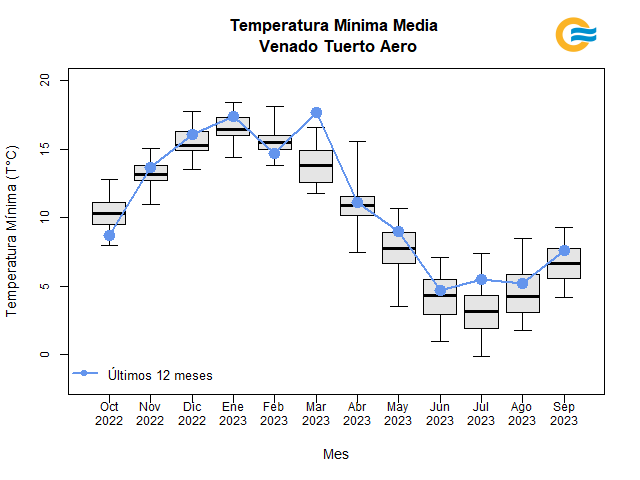

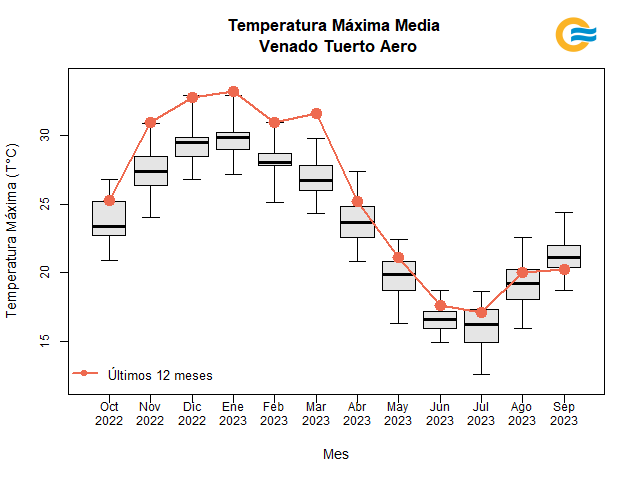

Para poder trabajar con un único valor, se toma la temperatura media como el promedio de la máxima y la mínima. El siguiente gráfico muestra dichos valores.  

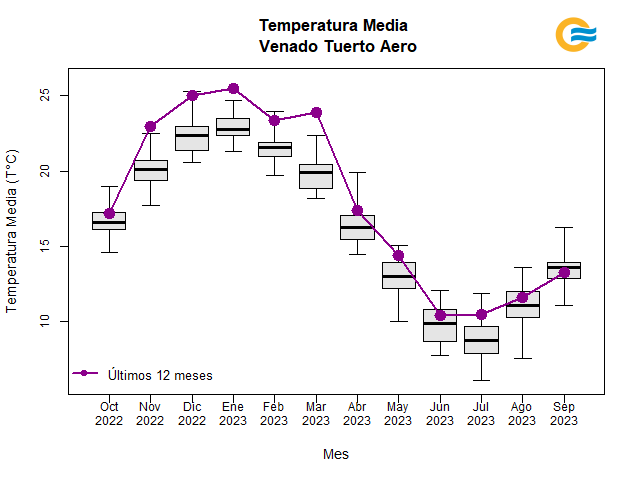

Un dato similiar de valores anomales se observan en las medidas de precipitaciones

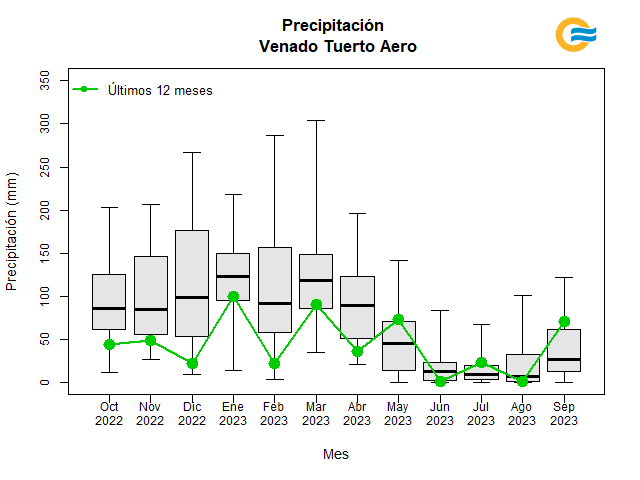

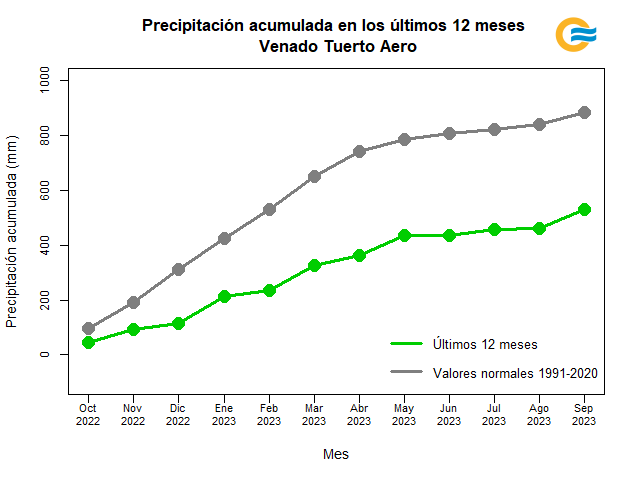

# Distribuciones Conjuntas (joint)

Similar al gráfico de pares que vimos anteriormente, podemos usar [`sns.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) para mostrar la distribución conjunta entre diferentes conjuntos de datos, junto con las distribuciones asociadas:

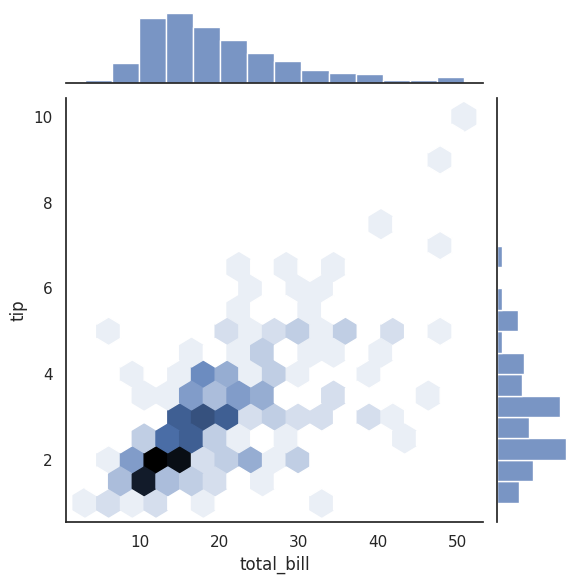

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

Usando `kind` el joint plot puede hacer las curvas KDE y calcular regresiones:

* __kind__ : { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” } Kind of plot to draw.


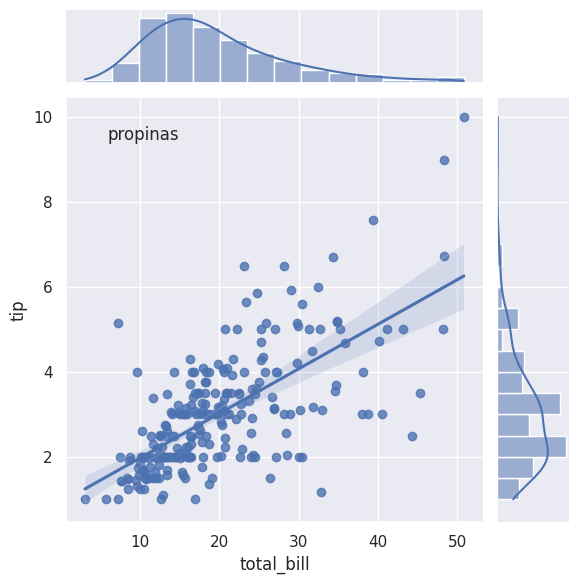

In [ ]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')

# como en matplotlib podemos anotarlos
g.ax_joint.annotate("propinas",
                    xy=(0.10, 0.90), xycoords='axes fraction');

## Iris joints

Vamos a retomar el ejemplo del dataset iris, para ver
otras opciones de joint plots y un uso grillas más profundo.

![Medidas](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

In [ ]:
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

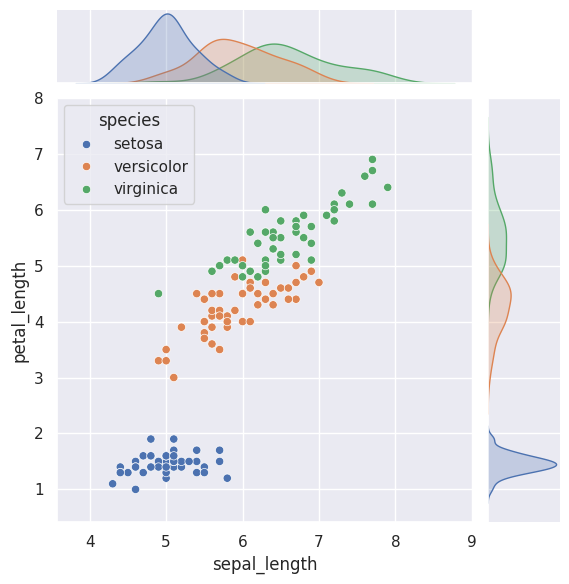

In [ ]:
# usamos hue, para diferenciar entre las especies
sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species", kind="scatter");


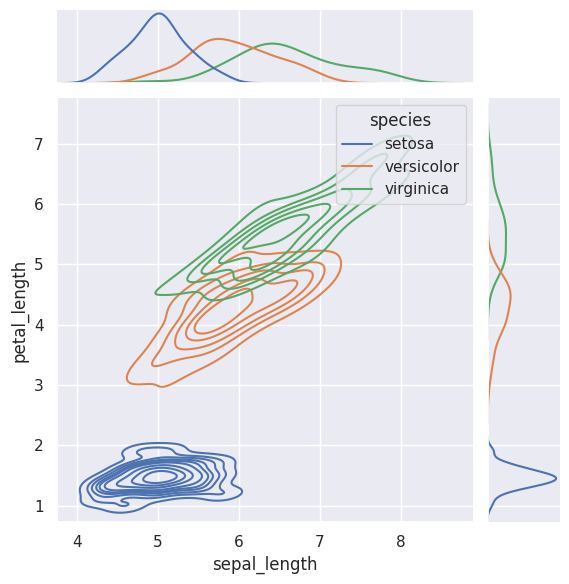

In [ ]:
# podemos graficar densidades, ojo si hay muchas
j = sns.jointplot(data=iris, x="sepal_length", y="petal_length", hue="species", kind="kde");

## Un mal ejemplo de jointplot

Carat == Quilates, es la unidad de medida del peso de los diamantes.
Un quilate es 0.20gr


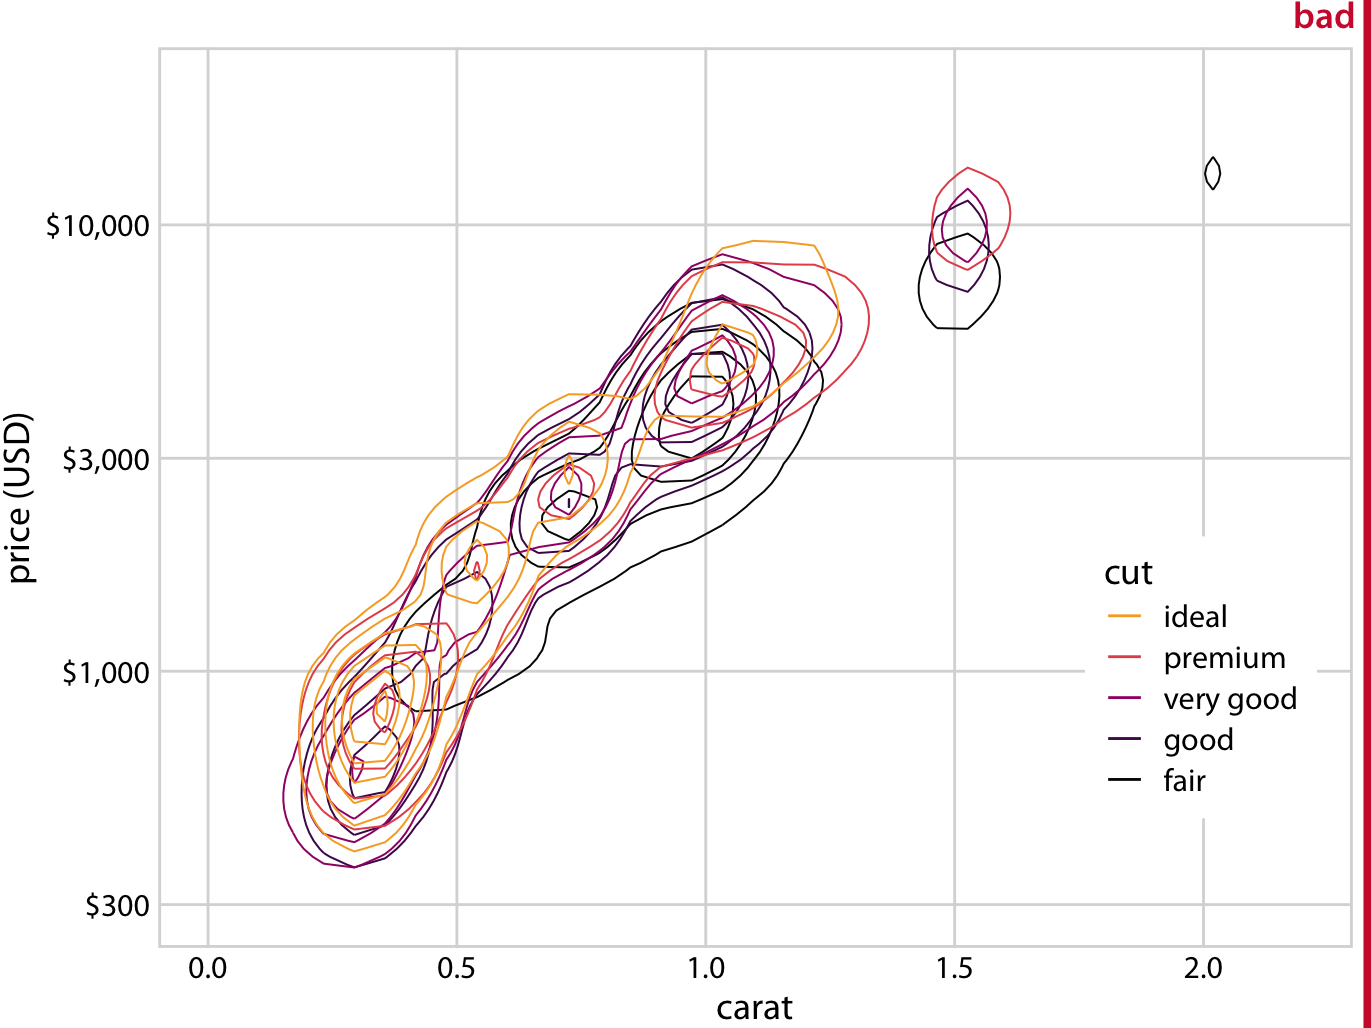

Figure 18.12: Price of diamonds versus their carat value. As Figure 18.11, but now individual points have been replaced by contour lines. The resulting plot is still labeled “bad”, because the contour lines all lie on top of each other. Neither the point distribution for individual cuts nor the overall point distribution can be discerned. Data source: Hadley Wickham, ggplot2

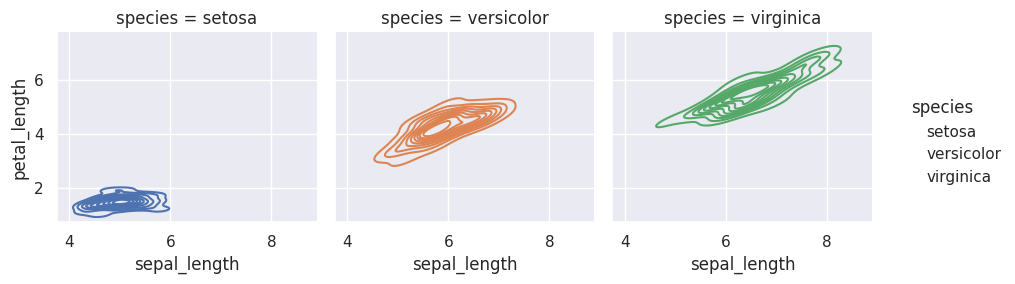

In [ ]:

# facetamos por columna de especiesa
g = sns.FacetGrid(iris, col="species", hue="species")  # para mantener los colores

# mostramos en cada faceta los contornos de largos de sepalos y petalos
g.map_dataframe(sns.kdeplot, x="sepal_length", y="petal_length")
g.add_legend();


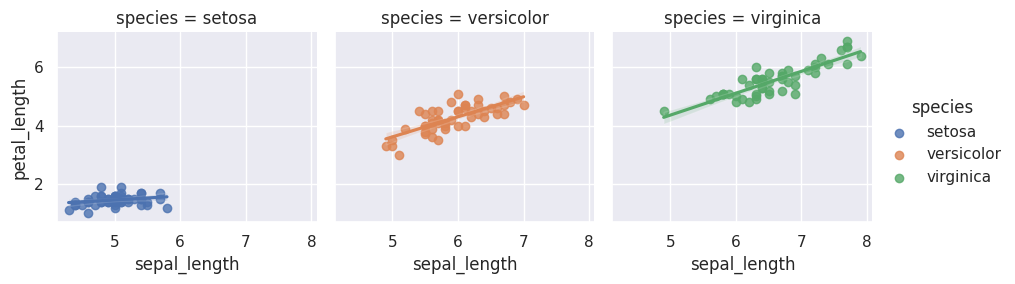

In [ ]:
# facetamos por columna de especiesa
g = sns.FacetGrid(iris, col="species", hue="species")  # para mantener los colores

# mostramos en cada faceta los contornos de largos de sepalos y petalos
g.map_dataframe(sns.regplot, x="sepal_length", y="petal_length")
g.add_legend();

## Hacer una función de faceta propia

Usando `FacetedGrid.map_dataframe` vamos a agregar más información al gráfico

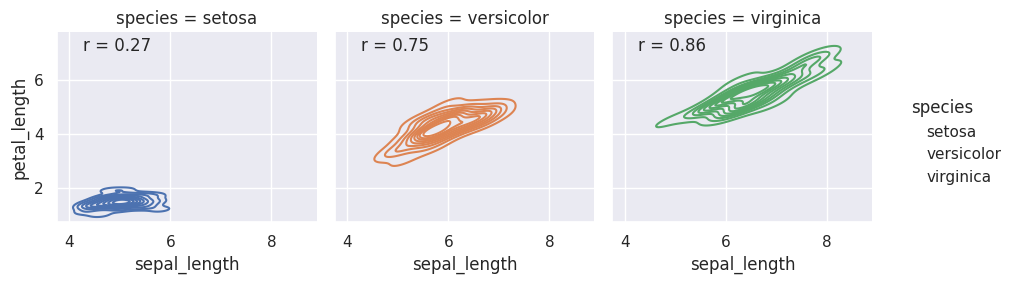

In [ ]:
def corrfunc(x=None, y=None, **kws):
    "calcula pearson y muestra en el eje acutal"

    data = kws["data"]
    coefs = data[[x, y]].corr()

    r = coefs.iloc[0, 1]

    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords="axes fraction")


# facetamos por columna time
g = sns.FacetGrid(iris, col="species", hue="species")

# usamos map_dataframe, como ejemplo de uso de parametros con nombre
g.map_dataframe(sns.kdeplot, x="sepal_length", y="petal_length")

# mapeamos con nuestra propia funcion para mostrar la correlacion
g.map_dataframe(corrfunc, x="sepal_length", y="petal_length")
g.add_legend();



Cambiando la función de mapeo podemos representar los scatter ajustando a una recta usando `reglin`.

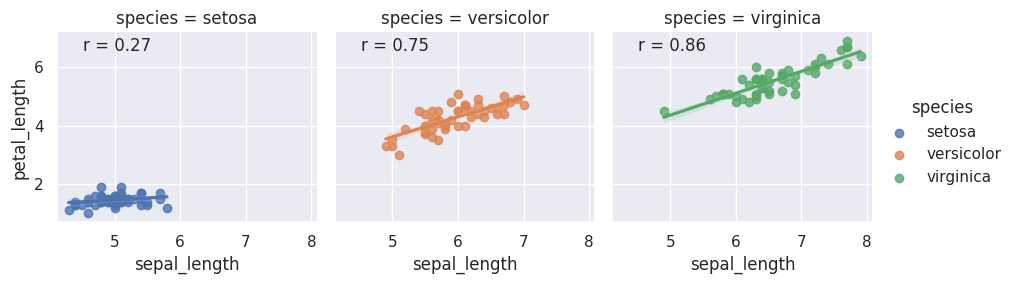

In [ ]:
# facetamos por columna time
g = sns.FacetGrid(iris, col="species", hue="species")

# usamos map_dataframe, como ejemplo de uso de parametros con nombre
g.map_dataframe(sns.regplot, x="sepal_length", y="petal_length")
g.map_dataframe(corrfunc, x="sepal_length", y="petal_length")
g.add_legend();

# Como elegir un gráfico según los datos

## Referencia Curso data visualualizatión de Kaggle



Kaggle de data visualization: https://www.kaggle.com/learn/data-visualization



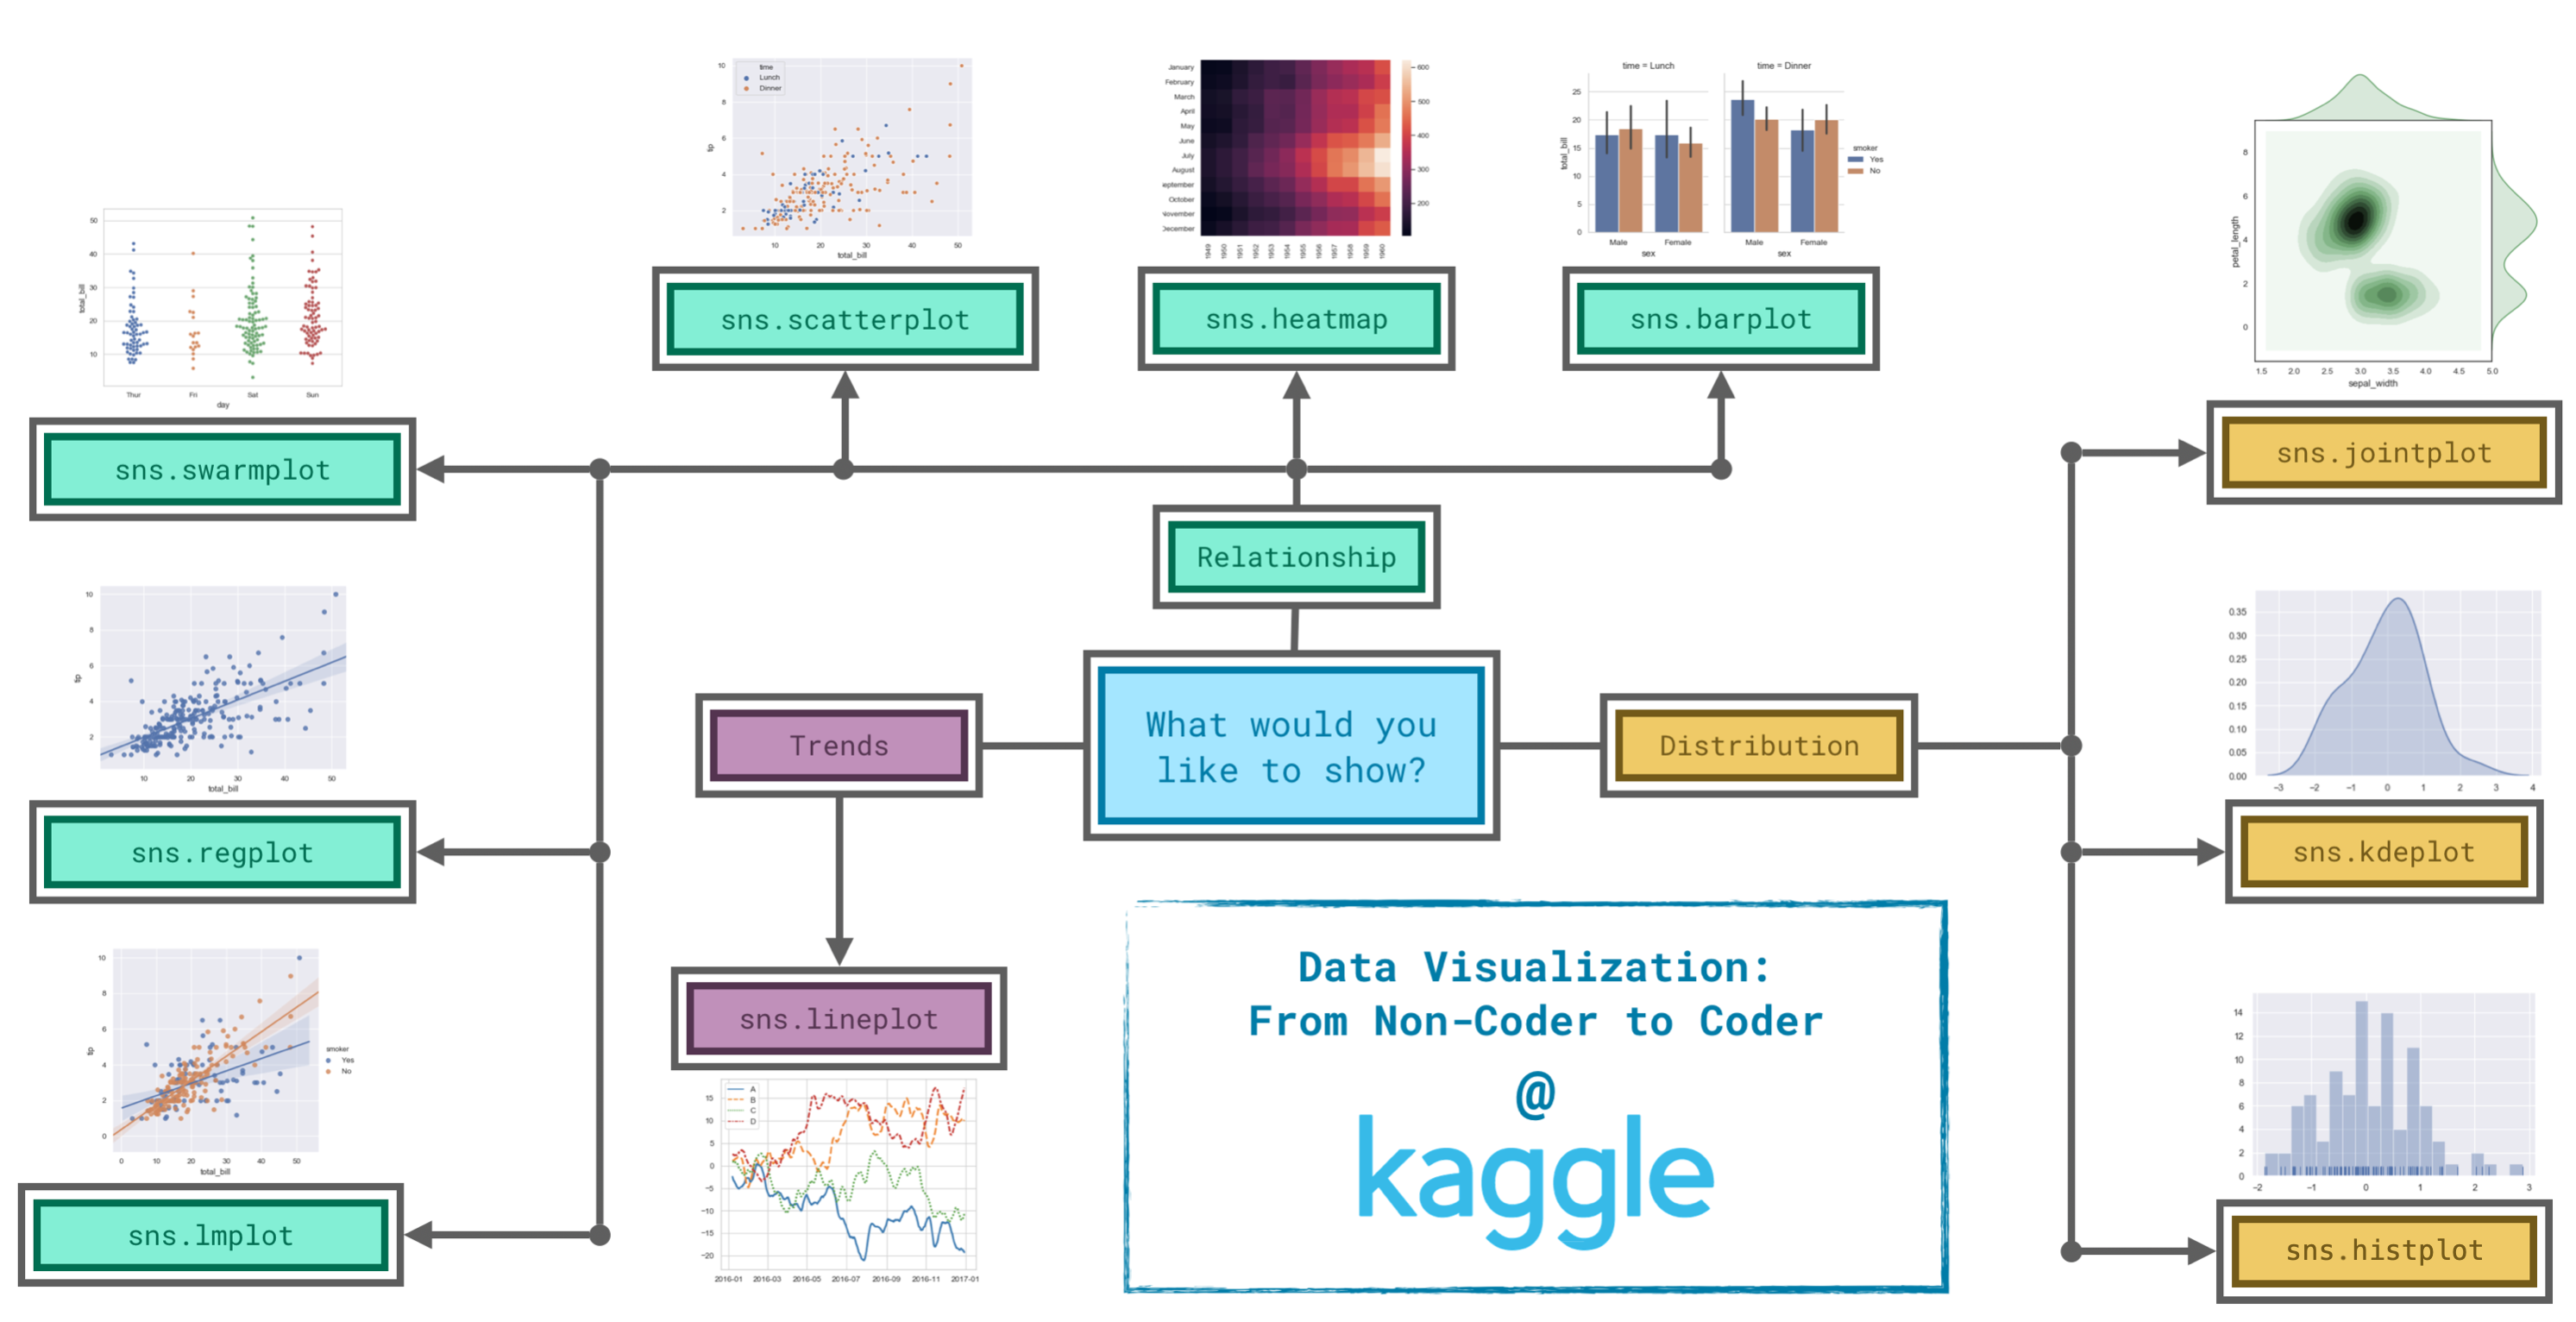

## Referencia portal datos.gob.es

Según el portal de datos abiertos de España:
https://datos.gob.es/es/blog/como-elegir-el-grafico-correcto-para-visualizar-datos-abiertos

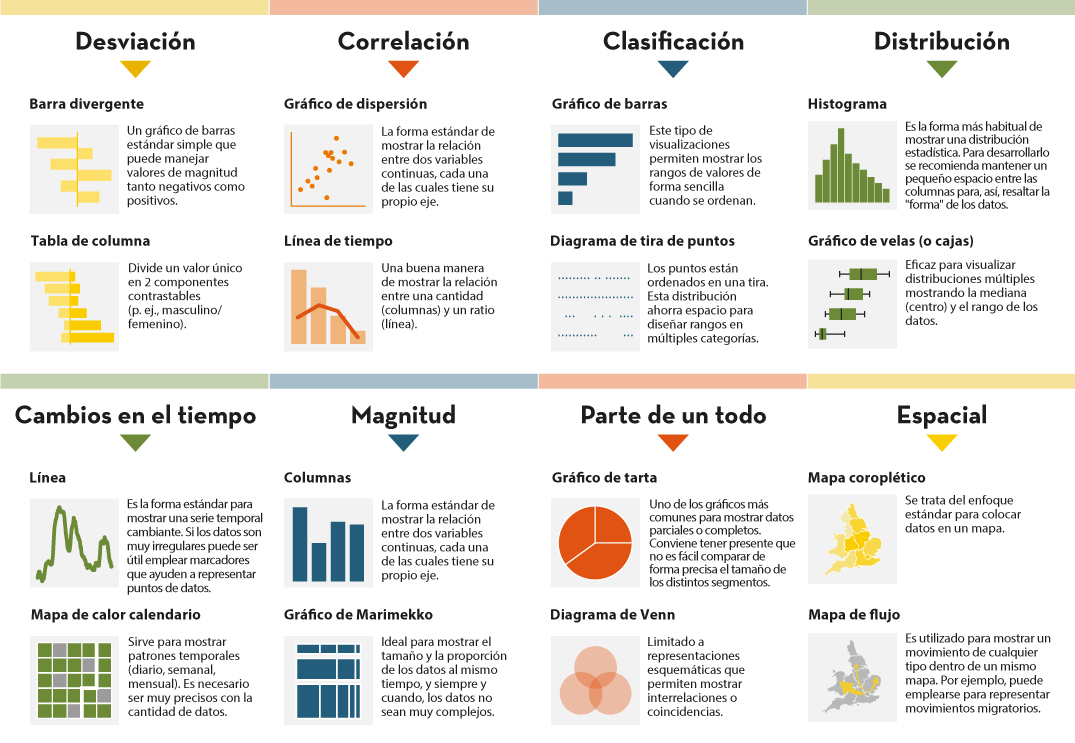

## Referencia Datacamp

Referencia: https://www.datacamp.com/cheat-sheet/data-viz-cheat-sheet

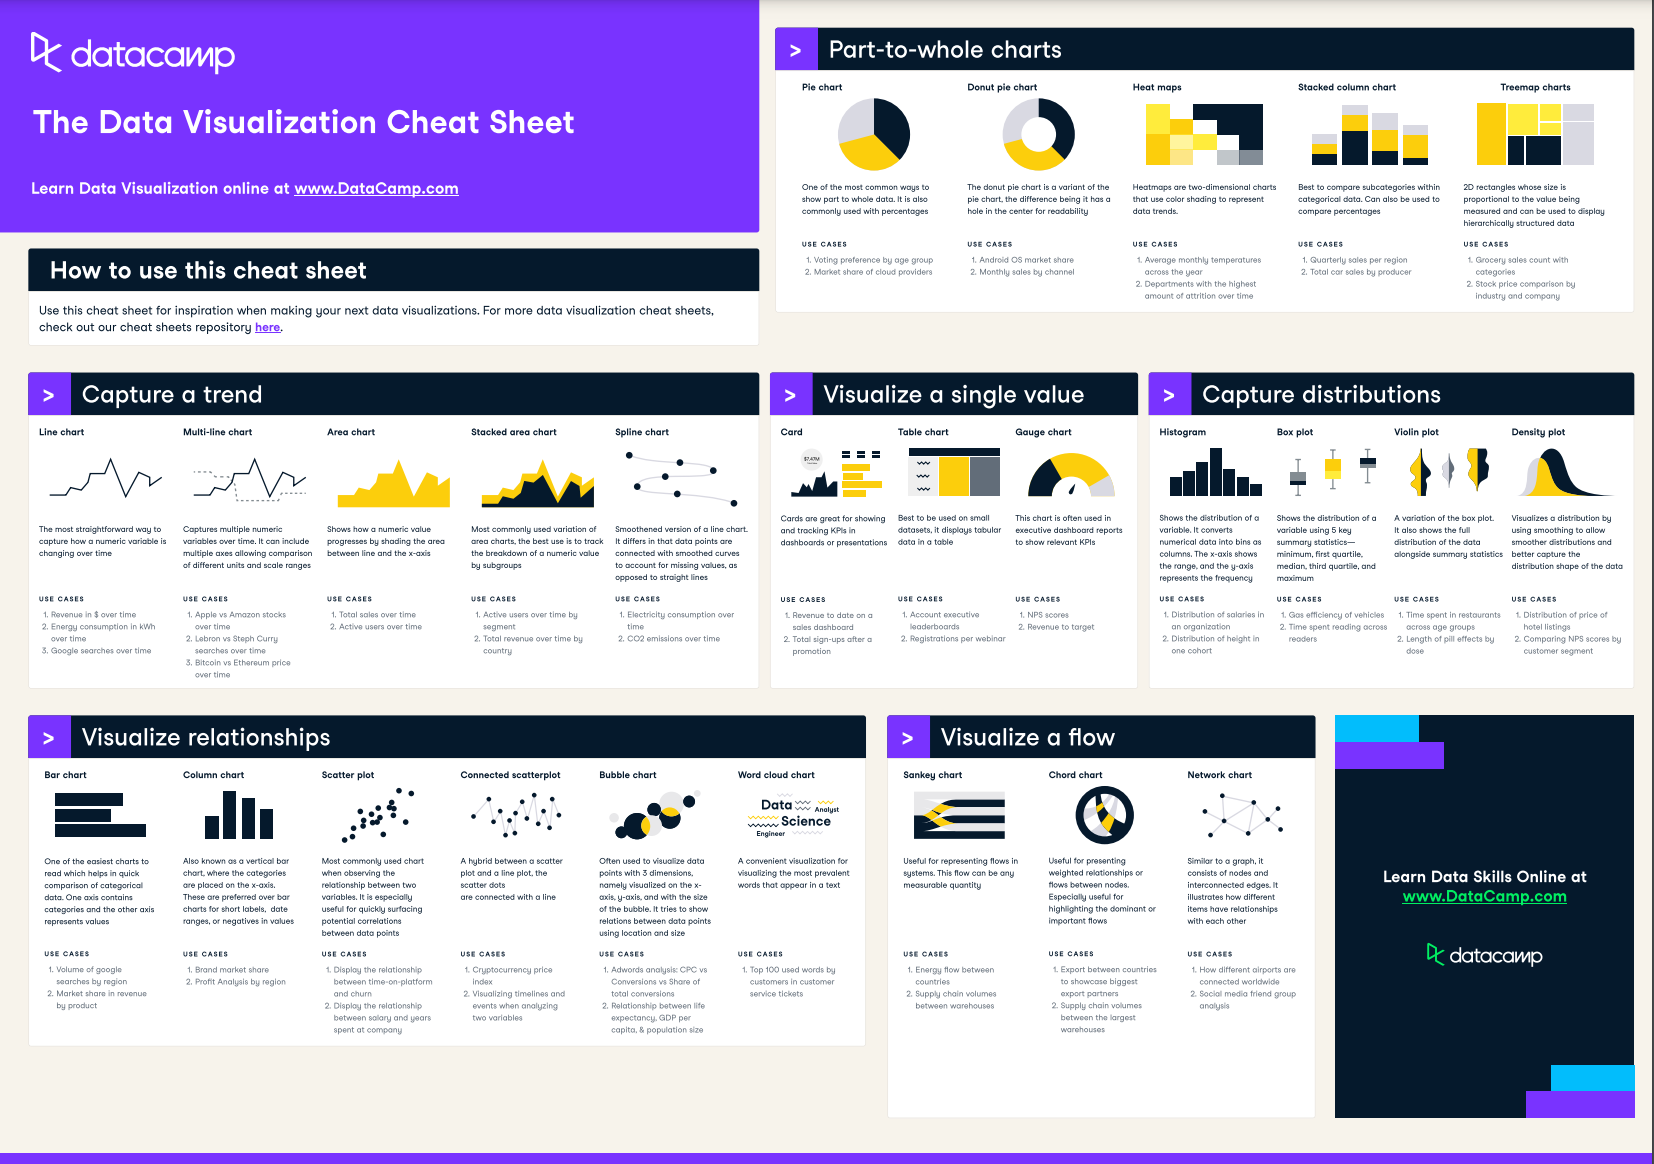